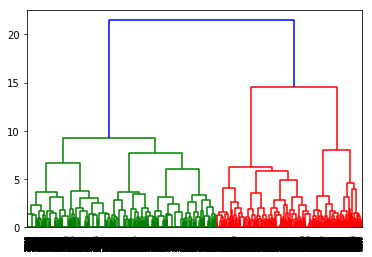

In [1]:
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT result_soc_t1,result_soc_t2,result_soc_t3,result_soc_t4,result_soc_t5,result_org_t1,result_org_t2,result_org_t3,result_org_t4,result_org_t5 FROM hand_simu_logs"

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data = data_base[:,135:145].astype(np.double)

cursor.close()
connector.close()

#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result1 = linkage(data, method='ward')
dendrogram(result1)
show()

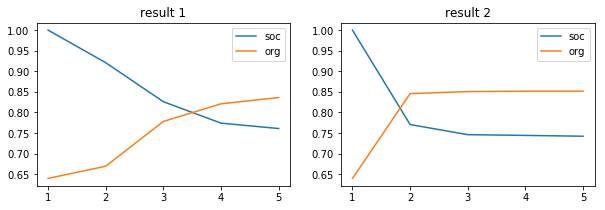

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [2]:
#結果の分類
div_n1 = 2

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data, cut_tree(result1, div_n1)), axis=1)
#np.where(joint[:,10]==0)
plt.clf()
plt.figure(figsize=(10, 3*math.ceil(div_n1/2)))

for n in range(div_n1):
    joint_d = joint[joint[:,10]==n]
    plt.subplot(math.ceil(div_n1/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n+1))
    plt.legend()
plt.show()

check = np.concatenate((data_base[:,145:146], cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check[check[:,0]==1])

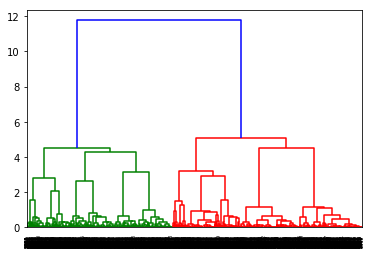

In [4]:
#特定結果の1人だけの分類
num=1

base_colmun=15+(num-1)*45
data = data_base[:,base_colmun+5:base_colmun+30].astype(np.double)
data = np.concatenate((data, cut_tree(result1, div_n1)), axis=1)
data = data[data[:,25]==0]

data_act = data_base[:,base_colmun:base_colmun+5].astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,5]=='0']

result2 = linkage(data[:,0:25], method='ward')
dendrogram(result2)
show()

In [5]:
div_n2 = 3

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data, cut_tree(result2, div_n2)), axis=1)

joint_act =  np.concatenate((data_act, cut_tree(result2, div_n2)), axis=1)




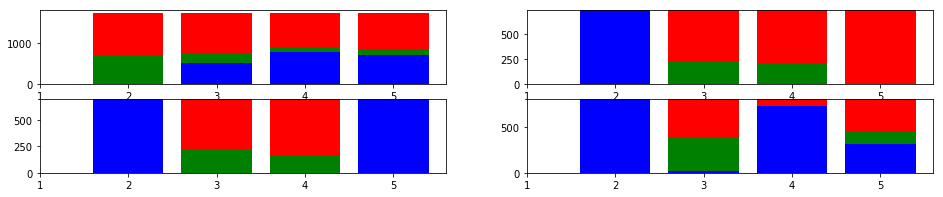

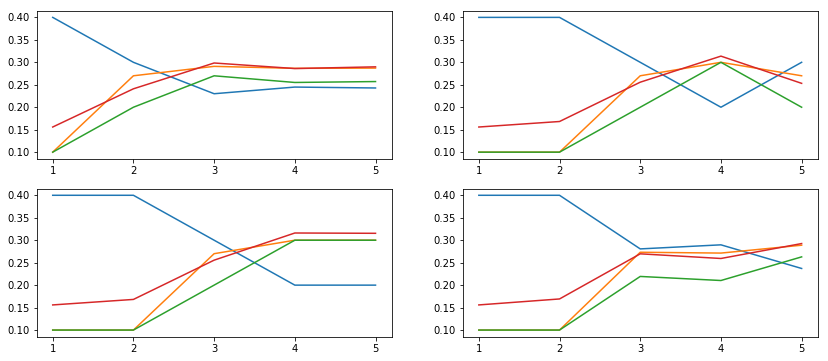

In [6]:
div_n2 = 4

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data, cut_tree(result2, div_n2)), axis=1)

joint_act =  np.concatenate((data_act, cut_tree(result2, div_n2)), axis=1)

plt.clf()
plt.figure(figsize=(16, 1.5*math.ceil(div_n2/2)))

for n in range(div_n2):
    plt.subplot(2, 2, n+1)
    joint_act_d = joint_act[joint_act[:,6]==str(n)]

    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,1:5]=='維持', axis=0)
    Y2 = np.sum(joint_act_d[:,1:5]=='模倣', axis=0)
    Y3 = np.sum(joint_act_d[:,1:5]=='探索', axis=0)

    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])


plt.show()


plt.clf()
plt.figure(figsize=(14, 3*math.ceil(div_n2/2)))


for n in range(div_n2):
    joint_d = joint[joint[:,26]==n]
    plt.subplot(math.ceil(div_n2/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20])
    plt.xticks([1,2,3,4,5])
plt.show()

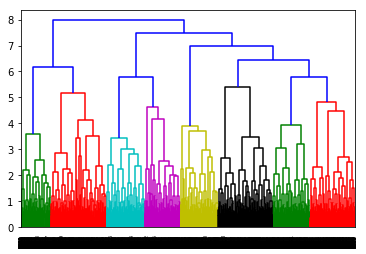

In [4]:
target_result = 1

#特定結果の全員の分類
data = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)
data = np.concatenate((data, cut_tree(result1, div_n1)), axis=1)
data = data[data[:,75]==target_result].astype(np.double)

#意思決定可視化のための抽出
data_act = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,15]==str(target_result)]

#決定木作成のための可視化
data_tree = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_tree = np.concatenate((data_tree, cut_tree(result1, div_n1)), axis=1)
data_tree = data_tree[data_tree[:,15]==str(target_result)]

result3 = linkage(data, method='ward')
dendrogram(result3)
show()

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


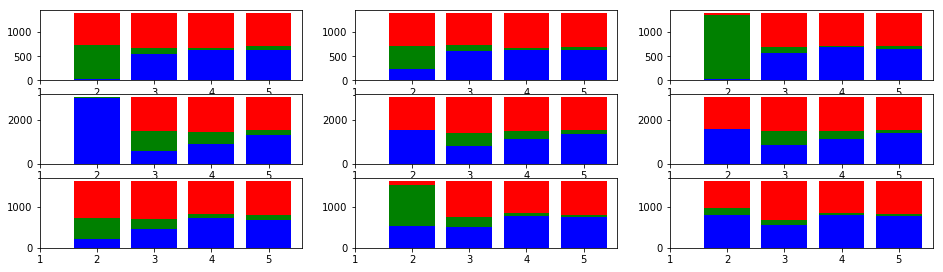

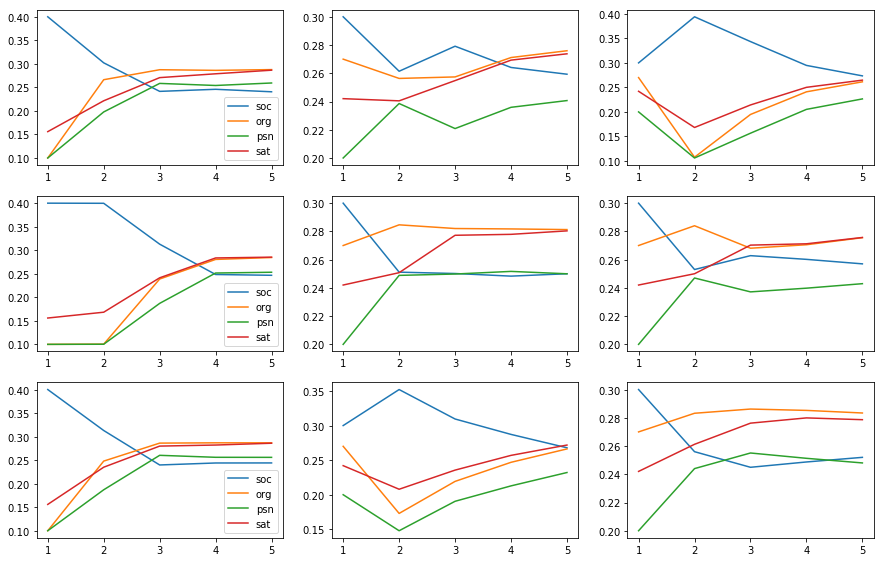

In [98]:
div_n3 = 3

joint =  np.concatenate((data, cut_tree(result3, div_n3)), axis=1)
joint_act =  np.concatenate((data_act, cut_tree(result3, div_n3)), axis=1)
data_tree =  np.concatenate((data_tree, cut_tree(result3, div_n3)), axis=1)

check_d = np.concatenate((check, cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])

plt.clf()
plt.figure(figsize=(16, 3*div_n3))

for n in range(div_n3):
    joint_act_d = joint_act[joint_act[:,16]==str(n)]

    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+1)
    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,1:5]=='conserve', axis=0)
    Y2 = np.sum(joint_act_d[:,1:5]=='modify', axis=0)
    Y3 = np.sum(joint_act_d[:,1:5]=='search', axis=0)
    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])

    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+2)
    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,6:10]=='conserve', axis=0)
    Y2 = np.sum(joint_act_d[:,6:10]=='modify', axis=0)
    Y3 = np.sum(joint_act_d[:,6:10]=='search', axis=0)
    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])
    
    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+3)
    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,11:15]=='conserve', axis=0)
    Y2 = np.sum(joint_act_d[:,11:15]=='modify', axis=0)
    Y3 = np.sum(joint_act_d[:,11:15]=='search', axis=0)
    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])
    
plt.show()


plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n3/2)))


for n in range(div_n3):
    joint_d = joint[joint[:,76]==n]
    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.legend()

    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+2)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+3)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
    plt.xticks([1,2,3,4,5])
plt.show()

#意思決定のファイル出力
np.savetxt('test.csv', data_tree,delimiter=',',fmt='%s')

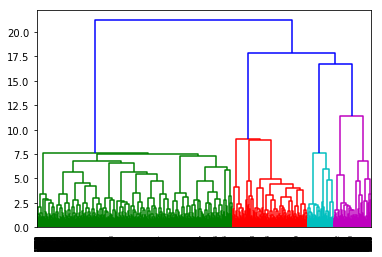

In [1]:
#プロセスから結果の分類
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT result_soc_t1,result_soc_t2,result_soc_t3,result_soc_t4,result_soc_t5,result_org_t1,result_org_t2,result_org_t3,result_org_t4,result_org_t5 FROM hand_simu_logs"

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)

cursor.close()
connector.close()

#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result1 = linkage(data, method='ward')
dendrogram(result1)
show()

In [108]:
div_n1 = 20

joint =  np.concatenate((data, cut_tree(result1, div_n1)), axis=1)

check_d = np.concatenate((check, cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])




plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n1/2)))


for n in range(div_n1):
    joint_d = joint[joint[:,75]==n]
    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.legend()

    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+2)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+3)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
    plt.xticks([1,2,3,4,5])
plt.show()

[[ 1  1 13]
 [ 1  1 13]
 [ 1  1 13]
 [ 1  1 13]
 [ 1  1 13]
 [ 1  1 13]]


KeyboardInterrupt: 

[[ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]]
17
429


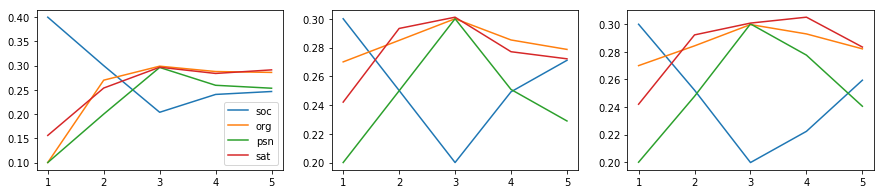

In [2]:
div_n1 = 30

joint =  np.concatenate((data, cut_tree(result1, div_n1)), axis=1)

check_d = np.concatenate((data_base[:,145:146], cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])

n=check_d[check_d[:,0]==1][0,1]

print(n)

plt.clf()
plt.figure(figsize=(15, 10))



joint_d = joint[joint[:,75]==n]
print(len(joint_d))
plt.subplot(3, 3, 1)
plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
plt.subplot(3, 3, 3)
plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
plt.xticks([1,2,3,4,5])
plt.show()

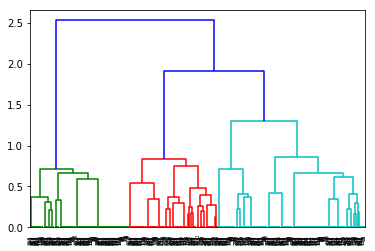

In [5]:
target_process = 17

#特定結果の全員の分類
data2 = data_base[:,135:145].astype(np.double)
data2 = np.concatenate((data2, cut_tree(result1, div_n1)), axis=1)
data2 = data2[data2[:,10]==target_process].astype(np.double)

#意思決定可視化のための抽出
data_act = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,15]==str(target_process)]

result3 = linkage(data2, method='ward')
dendrogram(result3)
show()

check2 = check_d[check_d[:,1]==target_process]


0:114
1:127
2:63
3:125


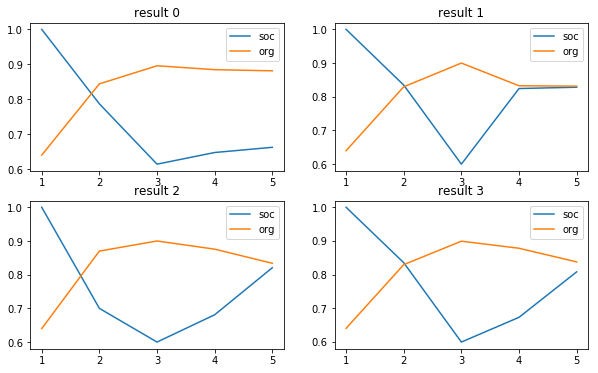

[[ 1 17  0]
 [ 1 17  0]
 [ 1 17  0]
 [ 1 17  0]
 [ 1 17  0]
 [ 1 17  0]]


In [4]:
#結果の分類
div_n2 = 4

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data2, cut_tree(result3, div_n2)), axis=1)
joint_act = np.concatenate((data_act, cut_tree(result3, div_n2)), axis=1)

#np.where(joint[:,10]==0)
plt.clf()
plt.figure(figsize=(10, 3*math.ceil(div_n2/2)))

for n in range(div_n2):
    joint_d = joint[joint[:,11]==n]
    print(str(n) + ":" + str(len(joint_d)))
    plt.subplot(math.ceil(div_n2/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n))
    plt.legend()
plt.show()

check2 = np.concatenate((check2, cut_tree(result3, div_n2)), axis=1).astype(np.int64)
print(check2[check2[:,0]==1])

#意思決定のファイル出力
np.savetxt('test.csv', joint_act,delimiter=',',fmt='%s')

In [22]:
target_process = 17
target_result = 0

data_extract = np.concatenate((data_base, cut_tree(result1, div_n1)), axis=1)
data_extract = data_extract[data_extract[:,len(data_extract[0])-1]==str(target_process)]
data_extract = np.concatenate((data_extract, cut_tree(result3, div_n2)), axis=1)
data_extract = data_extract[data_extract[:,len(data_extract[0])-1]==str(target_result)]

np.savetxt('test2.csv', data_extract,delimiter=',',fmt='%s')